1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
Mean Absolute Error (MAE): 21.746408315805272
Mean Squared Error (MSE): 506.75141485350554
Root Mean Squared Error (RMSE): 22.511139794632914
Mean Absolute Percentage Error (MAPE): 2.341794159039807%


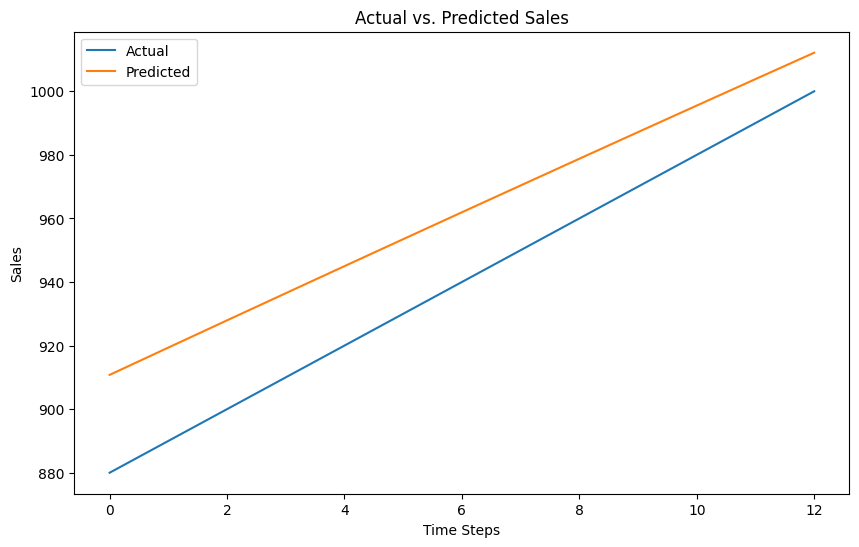

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the dataset
data = pd.read_csv("/Users/siriyalachandu/Desktop/forecast/data/company_data.csv")
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Preprocess the data
target = data['sales'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 30
X, y = create_sequences(target_scaled, seq_length)

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Load the trained model
model = load_model("/Users/siriyalachandu/Desktop/forecast/models/lstm_model.h5")

# Make predictions on the test data
y_pred_scaled = model.predict(X_test)

# Reverse scaling
y_pred = scaler.inverse_transform(y_pred_scaled)
y_actual = scaler.inverse_transform(y_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_actual, y_pred)
mse = mean_squared_error(y_actual, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_actual, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.title("Actual vs. Predicted Sales")
plt.xlabel("Time Steps")
plt.ylabel("Sales")
plt.show()